# 03 | Architecture theory and Computational Metaphor


### Preprocessing functions

Tokenize

In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join

import json, re, operator, string, nltk, pickle
from nltk.tokenize import word_tokenize

regex_str = [
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs

    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]

tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)

def tokenize(s):
    return tokens_re.findall(s)

def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

### Loading the Texts

* Luciana Parisi's SOFT THOUGHT (Load _Contagious Architecture_, 2013)

In [2]:
soft_thought = [x.strip() for x in open('Books_MINING/parisi_contagious-architecture.txt', 'r').readlines() if x and x.strip()] 
print(soft_thought[:1])

['Preface: Weird Formalism']


* Keller Easterling's ACTIVE FORM (Load _Extrastatecraft_, 2014 (and Viktor Hugo's Ted Talk)

In [3]:
active_form = [x.strip() for x in open('Books_MINING/easterling_extrastatecraft.txt', 'r').readlines() if x and x.strip()] # list of lines; x and x.strip checks if line is empty
print(active_form[:10])

['EXTRASTATECRAFT', 'The Power of', 'Infrastructure Space', 'Keller Easterling', 'The author would like to thank the Graham Foundation for Advanced', 'Studies in the Fine Arts for its generous assistance', 'First published by Verso 2014', '(c) Keller Easterling 2014', 'Contents', 'Acknowledgements']


* Bejnamin Bratton's STACK LAYER (Load _The Stack_, 2016)

In [12]:
stack_layer = [x.strip() for x in open('Books_MINING/bratton_stack.txt', 'r').readlines() if x and x.strip()]
print(stack_layer[:2])

['The Stack', 'On Software and Sovereignty']


## 1) Word Frequencies and Wordclouds

Import the necessary libraries and lists of stopwords.

In [4]:
from nltk.corpus import stopwords
from collections import Counter
from itertools import chain
from nltk.probability import FreqDist
from nltk import bigrams 

import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud

#stopwords
stop = stopwords.words('english') + list(string.punctuation) 

# lists for corpus comparison
corpus_active_form = []
corpus_soft_thought = []
corpus_stack_layer = []

In [26]:
# Frequency function
def count_freq(text, corpus):
    corpus = []
    text_terms = [term for term in preprocess(' '.join(map(str, text)))]
    all_tokens = [x.lower() for x in text_terms]
    # Count All Tokens
    tokens_number = len(all_tokens)
    corpus.append(('total tokens', tokens_number)) # update corpus comparison
    print('Total number of words in the collection: ', tokens_number)
    # remove stop words
    words = [term for term in all_tokens if term not in stop and len(term)>2]
    corpus.append(('meaningful words', len(words))) # update corpus comparison
    print('Total number of meaningful words (without stopwords and links): ', len(words))
    # Count terms only once, equivalent to Document Frequency
    unique_words = set(words)
    corpus.append(('unique words', len(unique_words))) # update corpus comparison
    print('Number of unique terms: ', len(unique_words))
    return words, corpus

### Word Frequency

#### SOFT THOUGHT

In [15]:
# Count all words
# Calculate word frequency for all terms (including hashtags and mentions)
words_soft_thought, corpus_soft_thought = count_freq(soft_thought, corpus_soft_thought)
words_soft_thought_freq = FreqDist(words_soft_thought)
print('The 100 most frequent terms, including special terms: ', words_soft_thought_freq.most_common(100))

Total number of words in the collection:  165225
Total number of meaningful words (without stopwords and links):  79565
Number of unique terms:  9841
The 100 most frequent terms, including special terms:  [('objects', 641), ('thought', 622), ('data', 602), ('space', 579), ('actual', 487), ('computation', 447), ('architecture', 424), ('algorithmic', 412), ('whitehead', 407), ('also', 387), ('new', 373), ('one', 357), ('algorithms', 346), ('relations', 330), ('physical', 318), ('computational', 309), ('quantities', 307), ('experience', 302), ('instead', 296), ('cognition', 292), ('according', 291), ('design', 282), ('digital', 270), ('time', 266), ('incomputable', 262), ('become', 257), ('thus', 257), ('cannot', 246), ('points', 236), ('brain', 232), ('form', 230), ('parametric', 222), ('another', 220), ('relation', 216), ('process', 216), ('soft', 215), ('parts', 213), ('chapter', 211), ('entities', 206), ('therefore', 206), ('simply', 205), ('control', 205), ('infinite', 205), ('notion

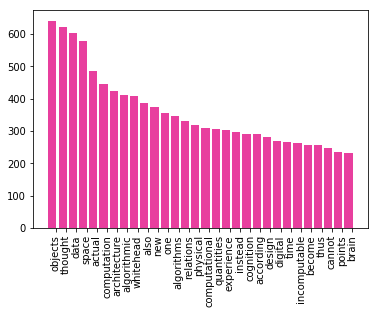

In [8]:
popularwords = words_soft_thought_freq.most_common(30)
labels, values = zip(*popularwords)
#print(labels, values)
# sort your values in descending order
indSort = np.argsort(values)[::-1]
# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]
indexes = np.arange(len(labels))
bar_width = 0.35
plt.bar(indexes, values, color='#E83F9E')
# add labels
plt.xticks(indexes + bar_width, labels, rotation='vertical')
plt.show()

In [16]:
### WRITING IT DOWN
with open('wordfrequency_soft_thought.txt', 'wb') as f:
    pickle.dump(words_soft_thought_freq.most_common(), f)

### to read back: 
#with open ('wordfrequency_scrape.txt', 'rb') as f:
    #words_only_scrape_freq = pickle.load(f)

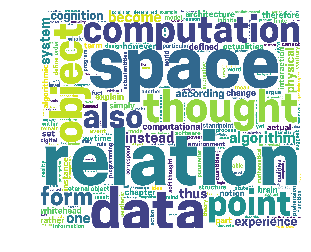

In [20]:
### WORDCLOUD

# convert list of terms (stream_terms_only) into a string
words = ' '.join(words_soft_thought)
# specify fonts, stopwords, background color and other options
wordcloud = WordCloud(font_path='/Users/zoza/Library/Fonts/CooperHewitt-Bold.otf',
                          stopwords=open('Twitter_MINING/twitter-sentiment-analysis-stopwords.txt').read().split(),
                          background_color='white',
                          width=2400,
                          height=2000
                         ).generate(words)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### ACTIVE FORM

In [27]:
# Count all words
# Calculate word frequency for all terms (including hashtags and mentions)
words_active_form, corpus_active_form = count_freq(active_form, corpus_active_form)
words_active_form_freq = FreqDist(words_active_form)
print('The 100 most frequent terms, including special terms: ', words_active_form_freq.most_common(100))

Total number of words in the collection:  94353
Total number of meaningful words (without stopwords and links):  47837
Number of unique terms:  10470
The 100 most frequent terms, including special terms:  [('world', 318), ('new', 296), ('also', 292), ('zone', 289), ('see', 249), ('global', 243), ('infrastructure', 239), ('like', 229), ('space', 217), ('zones', 202), ('iso', 182), ('management', 181), ('may', 168), ('international', 163), ('information', 158), ('economic', 157), ('city', 153), ('standards', 149), ('development', 148), ('free', 143), ('broadband', 137), ('quality', 133), ('political', 131), ('organization', 130), ('kenya', 125), ('forms', 124), ('often', 121), ('one', 121), ('even', 116), ('form', 107), ('countries', 106), ('social', 106), ('spatial', 105), ('disposition', 103), ('many', 102), ('yet', 102), ('state', 102), ('urban', 100), ('organizations', 100), ('power', 98), ('would', 94), ('active', 93), ('market', 93), ('business', 92), ('war', 92), ('cable', 91), ('

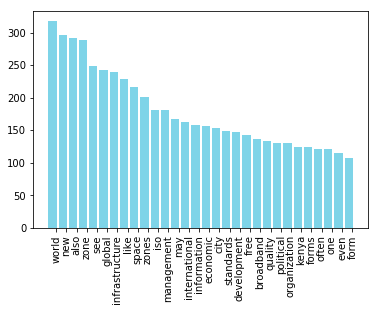

In [24]:
popularwords = words_active_form_freq.most_common(30)
labels, values = zip(*popularwords)
#print(labels, values)
# sort your values in descending order
indSort = np.argsort(values)[::-1]
# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]
indexes = np.arange(len(labels))
bar_width = 0.35
plt.bar(indexes, values, color='#7ED4E8')
# add labels
plt.xticks(indexes + bar_width, labels, rotation='vertical')
plt.show()

In [23]:
### WRITING IT DOWN
with open('wordfrequency_active_form.txt', 'wb') as f:
    pickle.dump(words_active_form_freq.most_common(), f)

### to read back: 
#with open ('wordfrequency_scrape.txt', 'rb') as f:
    #words_only_scrape_freq = pickle.load(f)

EXTRASTATECRAFT CORPUS STRUCTURE
[('total tokens', 94353), ('meaningful words', 47837), ('unique words', 10470)]


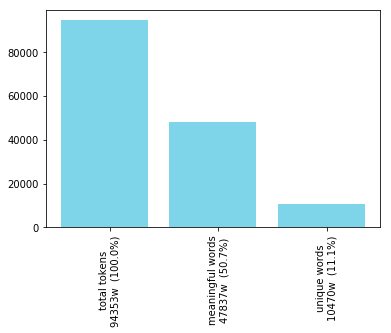

In [31]:
print('EXTRASTATECRAFT CORPUS STRUCTURE')
print(corpus_active_form)
labels, values = zip(*corpus_active_form)
labelstext = [str(lab)+str('\n')+str(val)+'w  ('+str(round(val/corpus_active_form[0][1]*100, 2))+'%)'  for lab,val in corpus_active_form]
# rearrange your data
labels = np.array(labelstext)
values = np.array(values)
indexes = np.arange(len(labels))
bar_width = 0.25
plt.bar(indexes, values, color='#7ED4E8')
# add labels
plt.xticks(indexes + bar_width-0.2, labels, rotation='vertical')
plt.show()

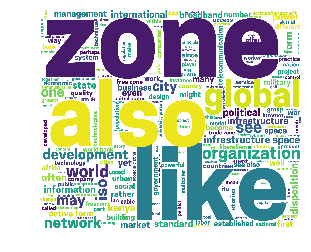

In [24]:
### WORDCLOUD

# convert list of terms (stream_terms_only) into a string
words = ' '.join(words_active_form)
# specify fonts, stopwords, background color and other options
wordcloud = WordCloud(font_path='/Users/zoza/Library/Fonts/CooperHewitt-Bold.otf',
                          stopwords=open('Twitter_MINING/twitter-sentiment-analysis-stopwords.txt').read().split(),
                          background_color='white',
                          width=2400,
                          height=2000
                         ).generate(words)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### THE STACK

In [18]:
# Count all words
# Calculate word frequency for all terms (including hashtags and mentions)
words_stack_layer, corpus_stack_layer = count_freq(stack_layer, corpus_stack_layer)
words_stack_layer_freq = FreqDist(words_stack_layer)
print('The 100 most frequent terms, including special terms: ', words_stack_layer_freq.most_common(100))

Total number of words in the collection:  282267
Total number of meaningful words (without stopwords and links):  135995
Number of unique terms:  19326
The 100 most frequent terms, including special terms:  [('one', 965), ('also', 884), ('may', 761), ('user', 757), ('stack', 673), ('cloud', 583), ('layer', 581), ('new', 571), ('platform', 567), ('design', 526), ('see', 503), ('world', 464), ('city', 436), ('would', 413), ('users', 402), ('platforms', 393), ('google', 388), ('even', 381), ('another', 381), ('systems', 376), ('political', 359), ('state', 354), ('information', 354), ('space', 342), ('data', 341), ('things', 321), ('like', 319), ('interfaces', 316), ('interface', 313), ('different', 311), ('perhaps', 308), ('within', 287), ('earth', 279), ('might', 272), ('time', 262), ('address', 257), ('interfacial', 255), ('global', 246), ('human', 246), ('way', 236), ('well', 233), ('architecture', 230), ('work', 226), ('computation', 226), ('network', 226), ('urban', 223), ('could', 2

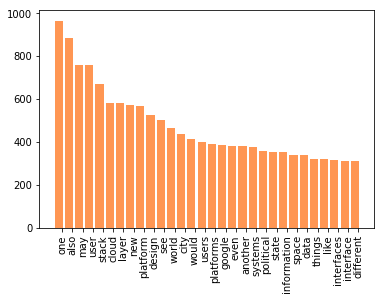

In [37]:
popularwords = words_stack_layer_freq.most_common(30)
labels, values = zip(*popularwords)
#print(labels, values)
# sort your values in descending order
indSort = np.argsort(values)[::-1]
# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]
indexes = np.arange(len(labels))
bar_width = 0.35
plt.bar(indexes, values, color='#FF9653')
# add labels
plt.xticks(indexes + bar_width, labels, rotation='vertical')
plt.show()

In [27]:
### WRITING IT DOWN
with open('wordfrequency_stack_layer.txt', 'wb') as f:
    pickle.dump(words_stack_layer_freq.most_common(), f)

### to read back: 
#with open ('wordfrequency_scrape.txt', 'rb') as f:
    #words_only_scrape_freq = pickle.load(f)

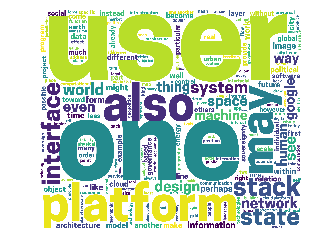

In [28]:
### WORDCLOUD

# convert list of terms (stream_terms_only) into a string
words = ' '.join(words_stack_layer)
# specify fonts, stopwords, background color and other options
wordcloud = WordCloud(font_path='/Users/zoza/Library/Fonts/CooperHewitt-Bold.otf',
                          stopwords=open('Twitter_MINING/twitter-sentiment-analysis-stopwords.txt').read().split(),
                          background_color='white',
                          width=2400,
                          height=2000
                         ).generate(words)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [78]:
corpora = corpus_soft_thought + corpus_active_form + corpus_stack_layer
#print([label+str(value) for label, value in corpora])
labels, values = zip(*corpora)
#labelstext = [str(lab)+str('\n')+str(','.join(str(i) for i in val)) for lab,val in corpora]
# rearrange your data
#labels = np.array(labelstext)
labels = np.array('one')
values = np.array(int(i) for i,j in values)
indexes = np.arange(len(labels))
bar_width = 0.35
plt.bar(indexes, values, color='#E83F9E')
# add labels
plt.xticks(indexes + bar_width, labels, rotation='vertical')
plt.show()

TypeError: len() of unsized object

## 2) Term Co-Occurences

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

def search_coocurrences(searchword, vectorizer):
    coocurrences = []
    for key, value in vectorizer.vocabulary_.items():
        if searchword in key:
            coocurrences.append(key)
    return coocurrences

In [23]:
# SOFT THOUGHT
bigram_vectorizer = CountVectorizer(ngram_range=(2, 3)) 
soft_thought_coocurrences = bigram_vectorizer.fit_transform(soft_thought)
soft_thought_search_list = words_soft_thought_freq.most_common(20) # 20 most common words
with open('co-ocurrences_soft_thought.txt', 'wb') as f:
    for i in range(len(soft_thought_search_list)):
        pickle.dump(search_coocurrences(soft_thought_search_list[i][0], bigram_vectorizer), f)
        print(search_coocurrences(soft_thought_search_list[i][0], bigram_vectorizer)[:10]) # first 20 co-occurences

['discrete objects', 'objects from', 'and discrete objects', 'discrete objects from', 'objects from this', 'and objects', 'objects algorithms', 'infrastructures and objects', 'and objects algorithms', 'objects algorithms are']
['of thought', 'thought can', 'kind of thought', 'of thought can', 'thought can be', 'and thought', 'thought because', 'thought specific', 'thetics and thought', 'and thought because']
['produce data', 'data in', 'random data', 'data within', 'of data', 'data to', 'entropic data', 'data are', 'data can', 'and produce data']
['digital space', 'space that', 'topological space', 'space stri', 'ated space', 'space is', 'the space', 'space of', 'new digital space', 'digital space that']
['entities actuali', 'actuali ties', 'performing entities actuali', 'entities actuali ties', 'actuali ties that', 'cultural actualities', 'actualities instead', 'new cultural actualities', 'cultural actualities instead', 'actualities instead of']
['of computation1', 'computation1 and',

In [24]:
# ACTIVE FORM
bigram_vectorizer = CountVectorizer(ngram_range=(2, 3)) 
active_form_coocurrences = bigram_vectorizer.fit_transform(active_form)
active_form_search_list = words_active_form_freq.most_common(20) # 20 most common words
with open('co-ocurrences_active_form.txt', 'wb') as f:
    for i in range(len(active_form_search_list)):
        pickle.dump(search_coocurrences(active_form_search_list[i][0], bigram_vectorizer), f)
        print(search_coocurrences(active_form_search_list[i][0], bigram_vectorizer)[:10]) # first 20 co-occurences

['the world', 'world all', 'our world', 'world are', 'in the world', 'the world all', 'world all of', 'of our world', 'our world are', 'world are evidence']
['susanna newbury', 'newbury dara', 'mcgrath susanna newbury', 'susanna newbury dara', 'newbury dara orenstein', 'in new', 'new geographies', 'cable in new', 'in new geographies', 'new geographies 2009']
['but also', 'also discoveries', 'thanks also', 'also go', 'clarifications but also', 'but also discoveries', 'also discoveries for', 'grateful thanks also', 'thanks also go', 'also go to']
['free zone', 'zone was', 'titled zone', 'the free zone', 'free zone was', 'zone was assembled', 'chapter titled zone', 'titled zone was', 'zone was first', 'publishing zone']
['and seemingly', 'seemingly innocuous', 'ubiquitous and seemingly', 'and seemingly innocuous', 'seemingly innocuous features', 'from seeing', 'seeing what', 'us from seeing', 'from seeing what', 'seeing what the']
['the global', 'global transportation', 'of global', 'glob

In [25]:
# STACK LAYER
bigram_vectorizer = CountVectorizer(ngram_range=(2, 3)) 
stack_layer_coocurrences = bigram_vectorizer.fit_transform(stack_layer)
stack_layer_search_list = words_stack_layer_freq.most_common(20) # 20 most common words
with open('co-ocurrences_stack_layer.txt', 'wb') as f:
    for i in range(len(stack_layer_search_list)):
        pickle.dump(search_coocurrences(stack_layer_search_list[i][0], bigram_vectorizer), f)
        print(search_coocurrences(stack_layer_search_list[i][0], bigram_vectorizer)[:10]) # first 20 co-occurences

['ericson simonetta', 'simonetta falasca', 'andrew jones', 'jones joshua', 'joel ericson simonetta', 'ericson simonetta falasca', 'simonetta falasca zamponi', 'jeremijenko andrew jones', 'andrew jones joshua', 'jones joshua kauffman']
['they also', 'also can', 'and they also', 'they also can', 'also can take', 'others also', 'also thank', 'thanks also', 'also to', 'many others also']
['david maymudes', 'maymudes cynthia', 'manferdini david maymudes', 'david maymudes cynthia', 'maymudes cynthia mccauley', 'that may', 'may exist', 'we may', 'may glimpse', 'cultures that may']
['and user', 'user chapters', 'earth and user', 'and user chapters', 'user chapters draw', 'objects users', 'users both', 'into objects users', 'objects users both', 'users both over']
['the stack', 'stack in', 'black stack', 'stack flux', 'setting the stack', 'the stack in', 'stack in motion', 'the black stack', 'black stack flux', 'stack flux journal']
['the cloud', 'cloud and', 'of the cloud', 'the cloud and', 'c

## 3) Sentiment Analysis

## 4) Keywords extraction

Extracting keywords from the list of tweets created with the above process.

First, tested a [Python implementation of the Rapid Automatic Keyword Extraction (RAKE) algorithm] (https://github.com/zelandiya/RAKE-tutorial)

In [ ]:
import Twitter_MINING.RAKEtutorial.rake as rk
import operator
rake_object = rk.Rake('Twitter_MINING/twitter-sentiment-analysis-stopwords.txt', 4, 3, 5) # words of minimum length 4, in groups of maximum 2, occurring at least 3 times in the text; this happens to give the best results with the particular corpus

In [ ]:
### SCRAPED TWEETS
# remove "float" objects: convert them to strings
tweets_scrape = ''
for item in tweets_l_scrape:
    try: 
        tweets_scrape += item
    except TypeError:
        tweets_scrape = tweets_scrape
# extract keywords
keywords_scraped = rake_object.run(tweets_scrape)
print(keywords_scraped[:30])

[('españa #opinión #bimonyourside', 18.57099292293467), ('escuela politécnica superior', 15.6), ('photographer aurélien villette', 14.916666666666666), ('cataluña son favorables', 14.20563909774436), ('tecnología #bim transformará', 12.62938613111027), ('stéphane côté', 11.93985260770975), ('cataluña implantará', 10.148496240601503), ('españa prevé', 9.4496336996337), ('un vídeo', 9.273488865323436), ('tres años', 9.244505494505495), ('españa y', 9.175949489107385), ('cheese sandwich modeled', 9.0), ('/gr4qzza2ix #wib #wia…', 9.0), ('@portofrotterdam @ramlabnl aim', 9.0), ('roaring tide productions', 9.0), ('simulating watercolor paints', 9.0), ('staircase crush @gemeentemuseum', 9.0), ('reserveer deze datum', 9.0), ('@eraikunecluster interesantes avances', 9.0), ('sleeping bags required', 9.0), ('/xlgbmdqrjv @mcavoygroup @hadeelsafaa…', 9.0), ('f1 champ @lewishamilton', 9.0), ('veauthier meyer architekten', 9.0), ('#iluminación @icandela_com', 8.99635922330097), ('aprende cómo', 8.960884353741497), ('las ediciones anteriores', 8.921052631578947), ('audio cassette tape', 8.86111111111111), ('un referente internac…', 8.75609756097561), ('un precio especial', 8.75609756097561)]

Results are not that convincing and do not reflect the word frequency represented before. Also, they depend a lot on the parameters with which Rake is called (word length, word group size, occurrence). Below are the best results:

### Keyword Extraction: Parser

Another small script: [keyword_extraction_w_parser](https://github.com/naushadzaman/keyword-extraction-from-tweets) (made for twitter specifically) provides a very flexible way to extract keywords, and works relatively well with the entire collection of tweets converted into a single string (as explained in: Preprocessing the text of tweets). For this purpose, I modified the string to include #hashtags and @mentions.

In [ ]:
import Twitter_MINING.keyword_extraction_w_parser as kep
keywords_2_scraped=kep.get_keywords(tweets_scrape)
print(keywords_2_scraped[0])